In [2]:

from google.colab import files

uploaded = files.upload()

!unzip "archive (1).zip"


Saving archive (1).zip to archive (1).zip
Archive:  archive (1).zip
  inflating: data.csv                


Total samples: 419509
a = 0.2
b = 0.6

Results:
λ = 0.00185
μ = 19.323183
c = 0.024269


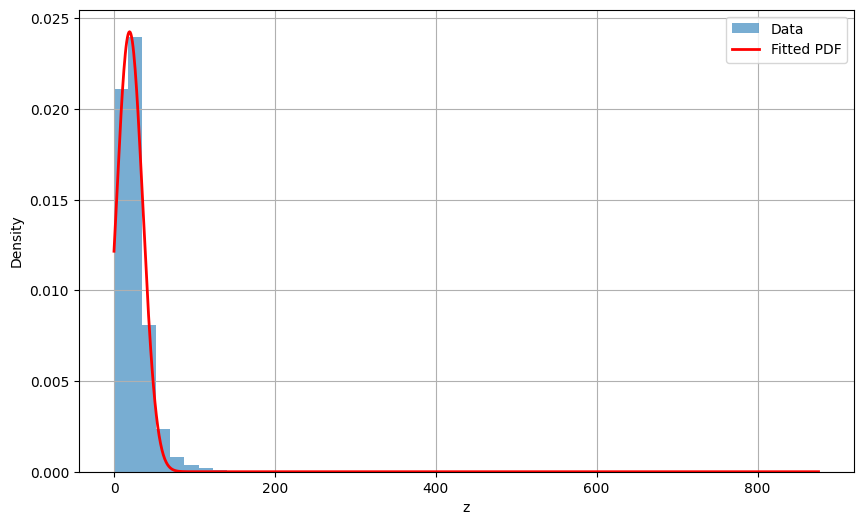

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the data file
df = pd.read_csv("data.csv", encoding="latin1", low_memory=False)
df.columns = df.columns.str.strip()

# Get NO2 values
x = pd.to_numeric(df["no2"], errors="coerce").dropna().values
print("Total samples:", len(x))

# Roll number
r = 102313061

# Calculate a and b
a = 0.05 * (r % 7)
b = 0.3 * ((r % 5) + 1)

print("a =", a)
print("b =", b)

# Transform data
z = x + a * np.sin(b * x)

# Make histogram
hist, edges = np.histogram(z, bins=50, density=True)
centers = (edges[:-1] + edges[1:]) / 2

# PDF function
def pdf(z_val, lam, mu, c):
    return c * np.exp(-lam * (z_val - mu)**2)

# Initial values
m = np.mean(z)
v = np.var(z)
lam0 = 1.0 / (2.0 * v)
mu0 = m
c0 = 0.02

# Fit the curve
params, cov = curve_fit(
    pdf,
    centers,
    hist,
    p0=[lam0, mu0, c0],
    bounds=([1e-12, -np.inf, 1e-12], [np.inf, np.inf, np.inf])
)

# Get parameters
lam = params[0]
mu = params[1]
c = params[2]

# Normalize c
c = np.sqrt(lam / np.pi)

# Show results
print("\nResults:")
print("λ =", round(lam, 6))
print("μ =", round(mu, 6))
print("c =", round(c, 6))

# Plot
z_plot = np.linspace(z.min(), z.max(), 1000)
y_plot = pdf(z_plot, lam, mu, c)

plt.figure(figsize=(10, 6))
plt.hist(z, bins=50, density=True, alpha=0.6, label="Data")
plt.plot(z_plot, y_plot, 'r-', linewidth=2, label="Fitted PDF")
plt.xlabel('z')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()